In [1]:
from matplotlib import pyplot as plt
from matplotlib import colormaps as cmps
import pandas as pd, numpy as np
from matplotlib.patches import ConnectionPatch

import itertools
from collections import Counter

In [2]:
def getVocabularyFromTokens(tokens):
    counts = Counter(itertools.chain(*tokens))
    return {k:v for k,v in sorted(counts.items(), key=lambda x: x[1] , reverse=True ) }

In [3]:
zincRot=pd.read_csv("data/01_zincRotatableToks.csv", usecols=['tokens']).squeeze()
zincRot=zincRot.str.split(' ', regex=False)

In [4]:
# load tokenized dataset
zinc=pd.read_csv("data/01_zincToks.csv", usecols=['tokens']).squeeze()
zinc=zinc.str.split(' ', regex=False)

In [5]:
# get vocabulary
vocab=getVocabularyFromTokens(zinc)

In [6]:
vocabRot=getVocabularyFromTokens(zincRot)

In [7]:
# [ ] remind HERE tsmiles
zincTsmiles=pd.read_csv("data/01_zincTsmilesToks_noDummy.csv", usecols=['tokens']).squeeze()
zincTsmiles=zincTsmiles.str.split(' ', regex=False)

In [8]:
vocabTsmiles=getVocabularyFromTokens(zincTsmiles)

In [9]:
len(vocabTsmiles)

12392

In [10]:
keysF=["N","C","c1ccccc1", "Nc1ccccc1", "Cc1ccccc1"]
benchmarking=pd.DataFrame ( 
   [  [len(_dict)]+[ _dict.get(k,0) for k in keysF]  for _dict in [vocab, vocabRot] ], 
              index=["exocyclic single bonds", "rotatable bonds"] , columns=["vocabulary size"]+keysF )
benchmarking.index.name = "fragmentation rule"

In [11]:
benchmarking

,vocabulary size,N,C,c1ccccc1,Nc1ccccc1,Cc1ccccc1
fragmentation rule,,,,,,
exocyclic single bonds,5869,247050,815799,203681,0,0
rotatable bonds,13035,191522,258876,102798,843,18981


In [12]:
freqs=pd.Series(vocab.values())
freqsRot=pd.Series(vocabRot.values())

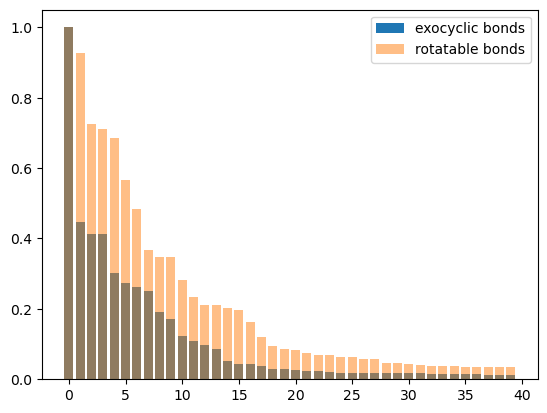

In [13]:
numTok = 40
x = range(40)
plt.bar(x,freqs.iloc[:numTok]/freqs.iat[0], label="exocyclic bonds")
plt.bar(x,freqsRot.iloc[:numTok]/freqsRot.iat[0], alpha=.5, label="rotatable bonds")

plt.legend()

In [15]:
freqsTsmiles=pd.Series(vocabTsmiles.values())

<BarContainer object of 40 artists>

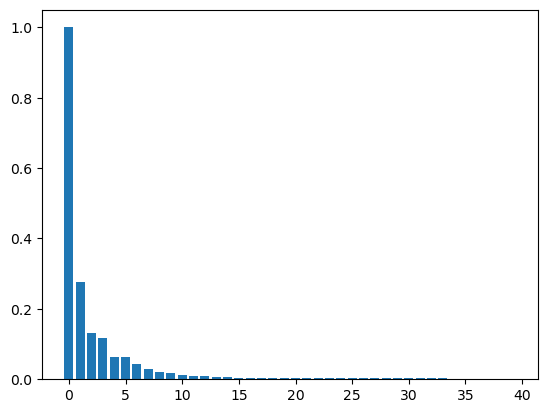

In [16]:
plt.bar(x,freqsTsmiles.iloc[:numTok]/freqsTsmiles.iat[0])

In [12]:
def setAx(ax, rang, ylim=None, fill=False, hatch="/", align="center", **kwargs):
    sl=slice(*rang)
    ax.set_xlim(rang)
    ax.bar(X[sl],Y[sl], align=align, fill=fill, hatch=hatch , **kwargs)
    if ylim:
        ax.set_ylim(ylim)

Text(0.05, 0.5, 'Absolute frequency • $10^{3}$')

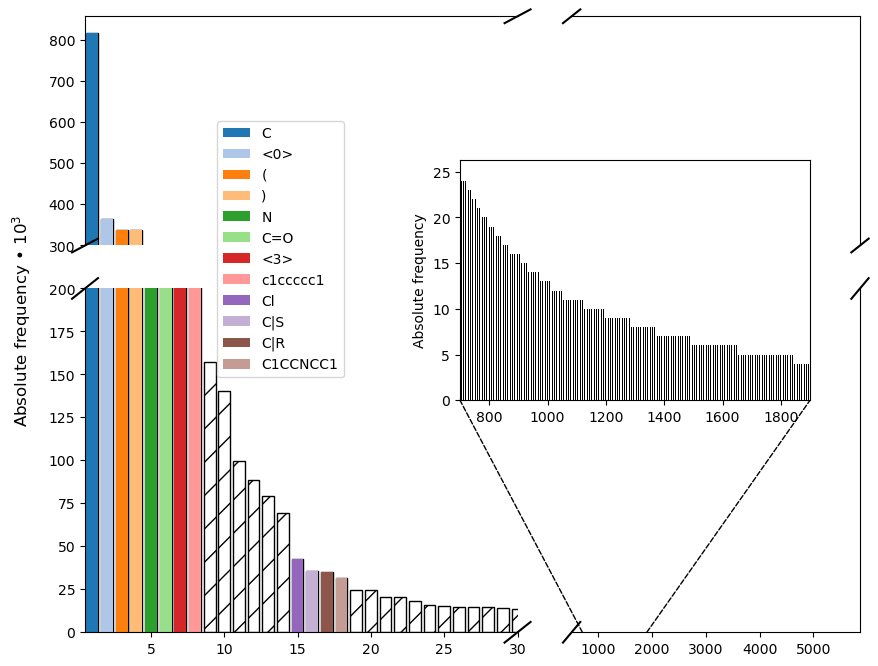

In [13]:
keys=list(vocab.keys())
Y=np.array(list(vocab.values()))
X=np.arange(len(vocab))+1
# fragHigh=["C","O","c1ccccc1","C=O","N"]
# fragHigh=keys[:14]
fragHigh=keys[:8]+keys[14:18]

x1=30
x2=500
# xZoom=[len(X)-1000, len(X)]
xZoom=[700, 1900]

idsHigh=[keys.index(f) for f in fragHigh]
xHigh=X[idsHigh]
yHigh=Y[idsHigh]

d = .03  # how big to make the diagonal lines in axes coordinates
kwargs = dict(color='k', clip_on=False)
constLabs=dict(labelbottom=False, bottom=False)

gridspec_kw={'height_ratios': [.4, .6], 'width_ratios': [.6, .4], 'wspace':.15, "hspace":.15}

fig, axes = plt.subplots(2, 2, figsize=(10,8), gridspec_kw=gridspec_kw)
axes[1,0].sharex(axes[0,0])
axes[1,1].sharex(axes[0,1])
axes[0,0].sharey(axes[0,1])
axes[1,1].sharey(axes[1,0])


# top left ##########
axes[0,0].spines['bottom'].set_visible(False)
axes[0,0].spines['right'].set_visible(False)
axes[0,0].tick_params(**constLabs)
setAx(axes[0,0], [None,x1], [300000,None])
axes[0,0].bar(xHigh, yHigh, align="center", color=cmps["tab20"].colors)

kwargs.update(transform=axes[0,0].transAxes)
axes[0,0].plot((-d, +d), (-d, +d), **kwargs)
axes[0,0].plot((1-d, 1+d), (1-d, 1+d), **kwargs)

axes[0,0].ticklabel_format(axis='y', style='scientific', scilimits=(+3,+3))
axes[0,0].yaxis.get_children()[1].set_visible(False)


# bot left ##########
axes[1,0].spines['top'].set_visible(False)
axes[1,0].spines['right'].set_visible(False)
axes[1,0].tick_params(labeltop=False)
setAx(axes[1,0], [None,x1], [0,200000])
axes[1,0].set_xlim([0.5,x1])


axes[1,0].bar(xHigh, yHigh, align="center", color=cmps["tab20"].colors, label=fragHigh)
axes[1,0].legend(bbox_to_anchor=(.25,.42), loc="lower left", bbox_transform=fig.transFigure)

axes[1,0].ticklabel_format(axis='y', style='scientific', scilimits=(+3,+3))
axes[1,0].yaxis.get_children()[1].set_visible(False)

kwargs.update(transform=axes[1,0].transAxes)
axes[1,0].plot((-d, +d), (1-d, 1+d), **kwargs)
axes[1,0].plot((1-d, 1+d), (-d, +d), **kwargs)


# bot right ##########
axes[1,1].spines['left'].set_visible(False)
axes[1,1].spines['top'].set_visible(False)
axes[1,1].tick_params(left=False, labelleft=False, labelright=False, right=False,)
# setAx(axes[1,1], [x2,len(X)],) # we don't need to plot these bars
axes[1,1].set_xlim([x2,len(X)])

kwargs.update(transform=axes[1,1].transAxes) 
axes[1,1].plot((-d, +d), (-d, +d), **kwargs)
axes[1,1].plot((1-d, 1+d), (1-d, 1+d), **kwargs)


# top right ##########
axes[0,1].spines['left'].set_visible(False)
axes[0,1].spines['bottom'].set_visible(False)
axes[0,1].tick_params(left=False, labelleft=False, **constLabs)
# setAx(axes[0,1], [x2,len(X)], ) # # we don't need to plot these bars

kwargs.update(transform=axes[0,1].transAxes) 
axes[0,1].plot((-d, +d), (1-d, 1+d), **kwargs)
axes[0,1].plot((1-d, 1+d), (-d, +d), **kwargs)

## bot right ZOOM
zoom = fig.add_axes([.5, .4, .35, .3]) # x,y, dx,dy
# zoom.tick_params(**constLabs)
zoom.set_ylabel('Absolute frequency')
cp1 = ConnectionPatch((xZoom[0],0), (0, 0), "data", "axes fraction",
                      axesA=axes[1,1], axesB=zoom, zorder=2, ls="dashed")

cp2 = ConnectionPatch((xZoom[1],0), (1, 0), "data", "axes fraction",
                      axesA=axes[1,1], axesB=zoom, zorder=2, ls="dashed")

axes[1,1].add_artist(cp1)
axes[1,1].add_artist(cp2)
setAx(zoom, xZoom, width=.5,  hatch=None, fill=True, color="black")

fig.supylabel('Absolute frequency'+' \u2022 $10^{3}$', x=0.05)